In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [166]:
data1 = pd.read_csv("../FilesEj2/OutputEj2_1.csv")
data2 = pd.read_csv("../FilesEj2/OutputEj2_2.csv")
data3 = pd.read_csv("../FilesEj2/OutputEj2_3.csv")
data4 = pd.read_csv("../FilesEj2/OutputEj2_4.csv")


In [167]:
data1_4 = pd.read_csv("../FilesEj4/OutputEj4_1.csv")
data2_4 = pd.read_csv("../FilesEj4/OutputEj4_2.csv")
data3_4 = pd.read_csv("../FilesEj4/OutputEj4_3.csv")
data4_4 = pd.read_csv("../FilesEj4/OutputEj4_4.csv")
data5_4 = pd.read_csv("../FilesEj4/OutputEj4_5.csv")


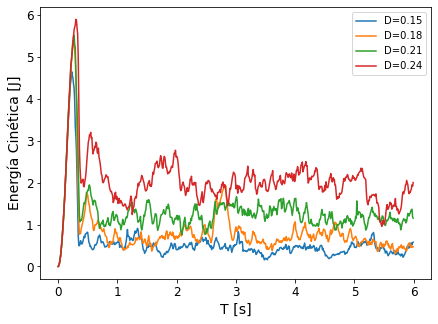

In [168]:
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(data1['Dt'], data1['KE'], label = "D=0.15")
plt.plot(data2['Dt'], data2['KE'], label = "D=0.18")
plt.plot(data3['Dt'], data3['KE'], label = "D=0.21")
plt.plot(data4['Dt'], data4['KE'], label = "D=0.24")
plt.xlabel("T [s]")
plt.ylabel("Energía Cinética [J]")
plt.legend()

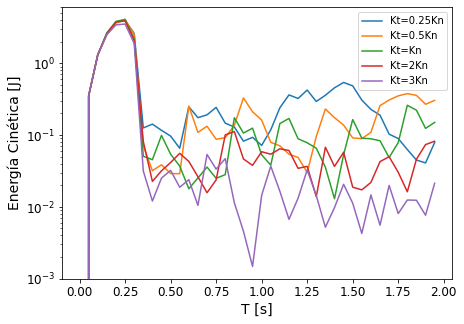

In [169]:
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(data1_4['Dt'], data1_4['KE'], label = "Kt=0.25Kn")
plt.plot(data2_4['Dt'], data2_4['KE'], label = "Kt=0.5Kn")
plt.plot(data3_4['Dt'], data3_4['KE'], label = "Kt=Kn")
plt.plot(data4_4['Dt'], data4_4['KE'], label = "Kt=2Kn")
plt.plot(data5_4['Dt'], data5_4['KE'], label = "Kt=3Kn")
plt.xlabel("T [s]")
plt.ylabel("Energía Cinética [J]")
plt.semilogy()
plt.legend()

In [170]:
time_equilibrio_025kn = 0.4
time_equilibrio_05kn = 0.4
time_equilibrio_kn = 0.4
time_equilibrio_2kn = 0.4
time_equilibrio_3kn = 0.4

In [171]:
def getIndex(array_t, array_n, t_equil):
    i = 0
    while i < len(array_t):
        if array_t[i] > t_equil:
            return array_n[i:-1:1]
        i+=1
    

In [172]:
#calcular los promedios de caudales para cada D
def get_values(array):
    caudal_promedio = array.mean()
    max = array.max()
    min = array.min()
    return caudal_promedio, max, min

In [173]:
values_kt1 = getIndex(data1_4['Dt'], data1_4['KE'], time_equilibrio_025kn)
values_kt2 = getIndex(data2_4['Dt'], data2_4['KE'], time_equilibrio_05kn)
values_kt3 = getIndex(data3_4['Dt'], data3_4['KE'], time_equilibrio_kn)
values_kt4 = getIndex(data4_4['Dt'], data4_4['KE'], time_equilibrio_2kn)
values_kt5 = getIndex(data5_4['Dt'], data5_4['KE'], time_equilibrio_3kn)
p1, max1, min1 = get_values(values_kt1)
p2, max2, min2 = get_values(values_kt2)
p3, max3, min3 = get_values(values_kt3)
p4, max4, min4 = get_values(values_kt4)
p5, max5, min5 = get_values(values_kt5)

[0.4987925512886168, 0.3483584610574129, 0.24700498328266057, 0.0980192325258748, 0.052121402349803295]
[0.2106913233705768, 0.15796992775944896, 0.08761114502097021, 0.0445255598882753, 0.017626354356074774]


Text(0, 0.5, 'Energía Cinética [J]')

<Figure size 504x360 with 0 Axes>

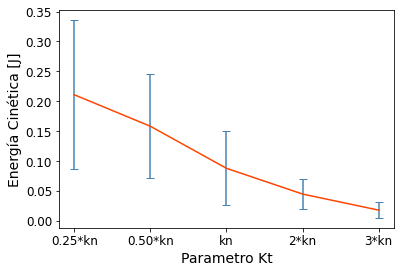

In [180]:
array_x = ["0.25*kn", "0.50*kn", "kn", "2*kn", "3*kn"]
array_y = [p1, p2, p3, p4, p5]
y_errs = [max1-min1, max2-min2, max3-min3, max4-min4, max5-min5]
print(y_errs)
print(array_y)
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.subplots()
plt.errorbar(array_x, array_y, yerr=np.array(y_errs)/4, capsize=4, color="orangered", ecolor="steelblue")
plt.xlabel("Parametro Kt")
# plt.semilogy()
plt.ylabel("Energía Cinética [J]")